# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

#### Instructions

3) Plot a correlation matrix, what can you see?

4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

5) What can you see in the plots?

6) Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

7) Have you found outliers? If you have, what should we do with them?

#### Instructions

1) Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
df.columns = [df.columns[col_name].lower().replace(' ','_') for col_name in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### Instructions

12) What should we do with the customer id column?

In [8]:
df.set_index('customer', inplace=True)
df.head(10)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize


In [9]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

#### Instructions

8) Check NaN values per column.

In [10]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### Instructions

2) Load the continuous and discrete variables into continuous_df and discrete_df variables.

9) Define a function that differentiates between continuous and discrete variables. 

    Hint: A number of unique values might be useful. 

    Store continuous data into a continuous variable and do the same for discrete and categorical.

10) For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 

    Hint: Use the same method you used in step 7. 

    Depending on the implementation, decide what to do with the variables you get.

11) Get categorical features.

In [30]:
def cat_dis_con(df):
    
    cat_filter = []
    dis_filter = []
    con_filter = []
    
    df_cat_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()
    df_num_cols = df.select_dtypes(include=['number', 'datetime']).columns.tolist()
    
    for col in df_cat_cols:
        print(col.upper(), "has", len(df[col].unique()), "unique values.")
        print("    This unique values are:", df[col].unique())
        print("    Storing", col.upper(), "as a categorical variable.")
        cat_filter.append(col)

    for col in df_num_cols:
        print(col.upper(), "has", len(df[col].unique()), "unique values.")
        if len(df[col].unique()) < len(df)/2:
            print("    This unique values are:", df[col].unique())
            print("    Storing", col.upper(), "as a discrete variable.")
            dis_filter.append(col)
        else:
            print("    It is probably a continuous variable.")
            print("    Storing", col.upper(), "as a continuous variable.")
            con_filter.append(col)
            
    return df[cat_filter], df[dis_filter], df[con_filter]

In [31]:
df_cat, df_dis, df_con = cat_dis_con(df)

STATE has 5 unique values.
    This unique values are: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
    Storing STATE as a categorical variable.
RESPONSE has 2 unique values.
    This unique values are: ['No' 'Yes']
    Storing RESPONSE as a categorical variable.
COVERAGE has 3 unique values.
    This unique values are: ['Basic' 'Extended' 'Premium']
    Storing COVERAGE as a categorical variable.
EDUCATION has 5 unique values.
    This unique values are: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
    Storing EDUCATION as a categorical variable.
EMPLOYMENTSTATUS has 5 unique values.
    This unique values are: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
    Storing EMPLOYMENTSTATUS as a categorical variable.
GENDER has 2 unique values.
    This unique values are: ['F' 'M']
    Storing GENDER as a categorical variable.
LOCATION_CODE has 3 unique values.
    This unique values are: ['Suburban' 'Rural' 'Urban']
    Storing LOCATION_CODE a

In [32]:
df_cat.head(10)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize


In [33]:
df_dis.head(10)

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,,
BU79786,2011-02-24,69,32,5,0,1
QZ44356,2011-01-31,94,13,42,0,8
AI49188,2011-02-19,108,18,38,0,2
WW63253,2011-01-20,106,18,65,0,7
HB64268,2011-02-03,73,12,44,0,1
OC83172,2011-01-25,69,14,94,0,2
XZ87318,2011-02-24,67,0,13,0,9
CF85061,2011-01-18,101,0,68,0,4
DY87989,2011-01-26,71,13,3,0,2


In [34]:
df_con.head(10)

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.519279,56274,384.811147
QZ44356,6979.535903,0,1131.464935
AI49188,12887.431650,48767,566.472247
WW63253,7645.861827,0,529.881344
HB64268,2813.692575,43836,138.130879
OC83172,8256.297800,62902,159.383042
XZ87318,5380.898636,55350,321.600000
CF85061,7216.100311,0,363.029680
DY87989,24127.504020,14072,511.200000


#### Instructions

3) Plot a correlation matrix, what can you see?

In [35]:
corr_mat = df.corr(method='spearman')
corr_mat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


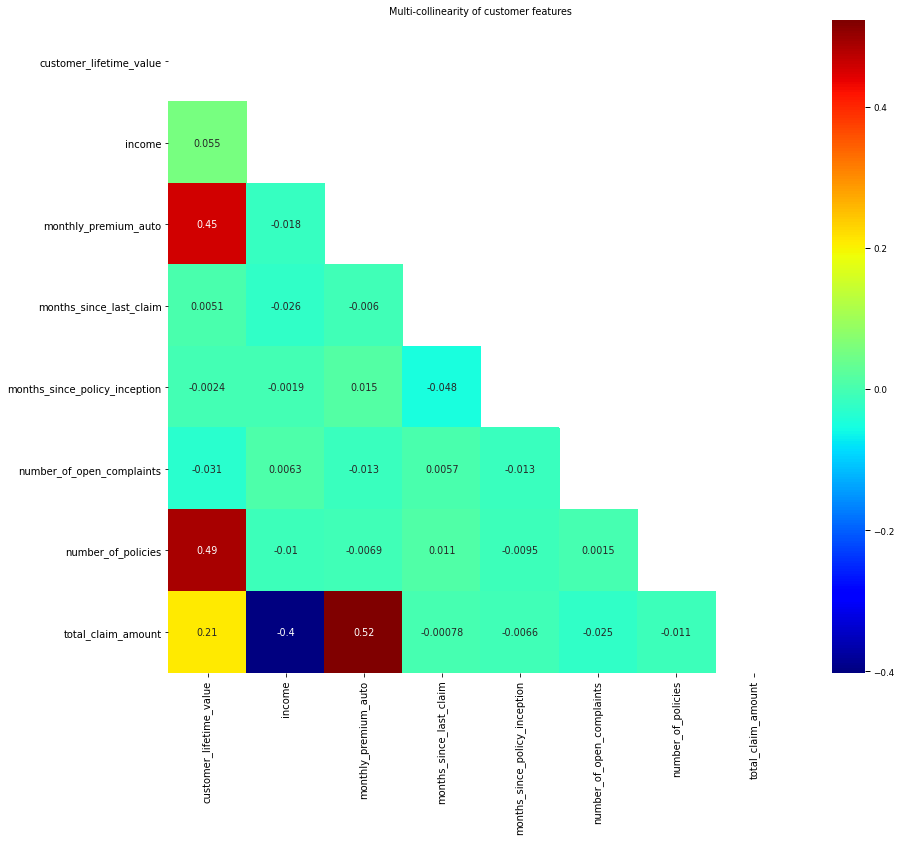

In [36]:
# Plot a correlation matrix to locate possible correlation right away

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()
# plt.savefig('heatmap.png') 

#### Instructions

4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

5) What can you see in the plots?

In [38]:
def plot_vars(df):
    for column in df.select_dtypes(np.number).columns:
        sns.distplot(df[column])
        plt.show()

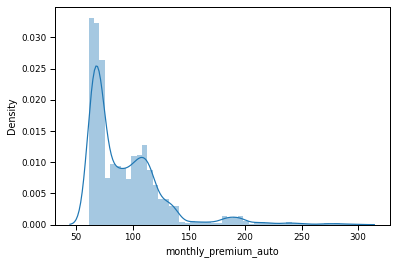

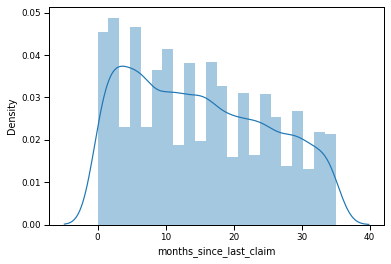

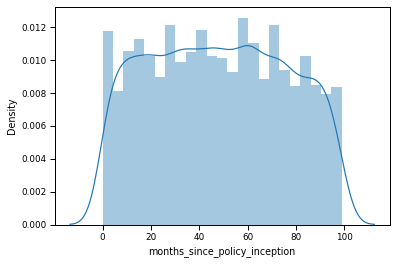

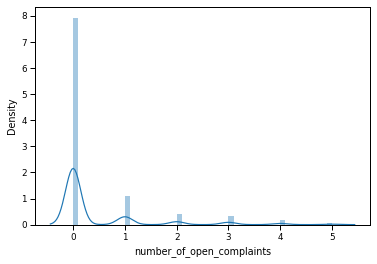

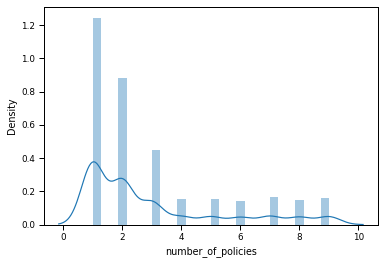

In [39]:
plot_vars(df_dis)

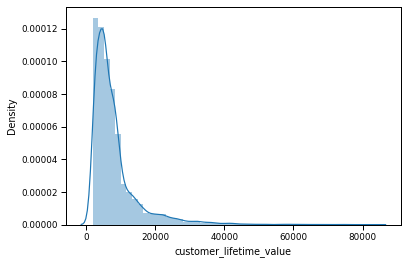

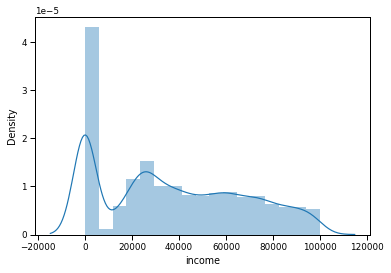

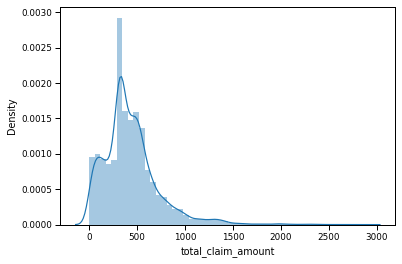

In [40]:
plot_vars(df_con)

#### Instructions

6) Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

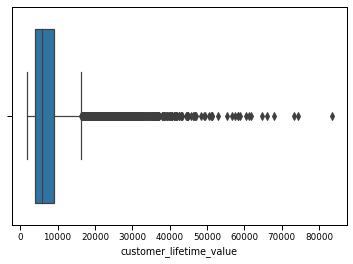

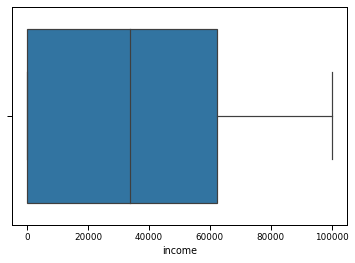

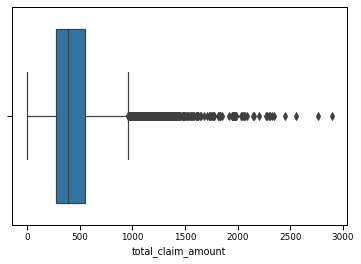

In [47]:
for column in df_con.columns:
        sns.boxplot(df_con[column])
        plt.show()

#### Instructions

7) Have you found outliers? If you have, what should we do with them?

In [54]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(include='number').columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [55]:
df_con2 = remove_outliers(df_con, threshold=3, in_columns=df_con.columns)
# now filter the outliers on the more important columns with a tighter threshold
df_con2

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.519279,56274,384.811147
QZ44356,6979.535903,0,1131.464935
AI49188,12887.431650,48767,566.472247
WW63253,7645.861827,0,529.881344
HB64268,2813.692575,43836,138.130879
...,...,...,...
LA72316,23405.987980,71941,198.234764
PK87824,3096.511217,21604,379.200000
TD14365,8163.890428,0,790.784983


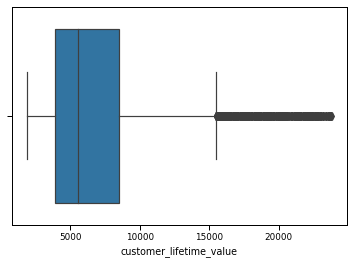

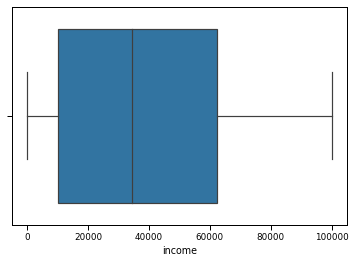

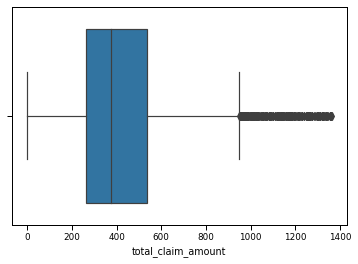

In [56]:
for column in df_con2.columns:
        sns.boxplot(df_con2[column])
        plt.show()